## Presentation brief: 

### Present a data analysis case that provides valuable insights to decision makers based on a dataset of your choice.

In [644]:
import pandas as pd
import numpy as np
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
import matplotlib.pyplot as plt
import re
import string
import requests
from bs4 import BeautifulSoup as bs

from datetime import date, datetime, timedelta
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhilashroy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/abhilashroy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Data Collection and Pre-processing.

In [2]:
url_centrica_reviews_glassdoor = f"https://www.glassdoor.co.uk/Reviews/Centrica-Reviews-E6731_P3.htm?filter.iso3Language=eng"
r_centrica_reviews_glassdoor = requests.get(url_centrica_reviews_glassdoor)
print(r_centrica_reviews_glassdoor)

<Response [403]>


#### Use "https://curlconverter.com" to get cookies, headers and parameters for the Glassdoor website so that data can be pulled without signing in.

In [140]:
cookies = {
    'asst': '1666025194.2',
    'AFSID': 'ZGQzZWY5ODEtMTY2Yi00YzdkLTg2YmEtMGJlZDk3ZmYzOTdl',
    'AWSALB': 'Jel6KYBxpKvDdK3KdBoACvAgOdTwT/oU5PPkpR4/cDvCcM+uGP44rYjDrHYRcoq8roU/gLM73ZHgb069g2SB/v2xZ9VV+AT0gYo7ReTX2DW4gJ1Z4+XEPkU5IKS+BUIR19xdjd8fi47bLZ9ItQlBZkvaGJzOorpdL32cBeStvO1zNHG0lh+H9mRSE6bDVYbhOka6Cpna31rH9ywV9o7mI7iF4z9UNqaqe6hfYXWs7u0M2gbmH1my45uBmEHMVuG0tCWID3CQkeIRAp2jMl2uolSLMK5C69VWKhPoD9Y92zuz+vptg6hlaQLIbZJ6ZByG',
    'AWSALBCORS': 'Jel6KYBxpKvDdK3KdBoACvAgOdTwT/oU5PPkpR4/cDvCcM+uGP44rYjDrHYRcoq8roU/gLM73ZHgb069g2SB/v2xZ9VV+AT0gYo7ReTX2DW4gJ1Z4+XEPkU5IKS+BUIR19xdjd8fi47bLZ9ItQlBZkvaGJzOorpdL32cBeStvO1zNHG0lh+H9mRSE6bDVYbhOka6Cpna31rH9ywV9o7mI7iF4z9UNqaqe6hfYXWs7u0M2gbmH1my45uBmEHMVuG0tCWID3CQkeIRAp2jMl2uolSLMK5C69VWKhPoD9Y92zuz+vptg6hlaQLIbZJ6ZByG',
    'JSESSIONID': '5A3D9E4F443EA543829D108C2A50F645',
    'cass': '1',
    'gdId': 'e02bf0ab-21b8-4015-b8f8-62ca822b144f',
    '__cf_bm': '0P_XSQDeD5kKK19HRQfa_MLd0gJ7bfF45sCEJ99XNrU-1666029624-0-Ab4mhFhgIBNuA/+u3XHMjtXUeo2dUnZHcHBlUD6Eden8fiKdUI2d2AFmRPMXDivD6VS0lpa9tbHujbkgg/UU908=',
    'gdsid': '1666020471527:1666029892727:0607982FC9DFBA1A2DE9DA599B1C2160',
    'OptanonConsent': 'isGpcEnabled=0&datestamp=Mon+Oct+17+2022+19%3A01%3A43+GMT%2B0100+(British+Summer+Time)&version=202209.2.0&isIABGlobal=false&hosts=&consentId=072d7ace-5857-4e47-866f-d0cf7ef73984&interactionCount=1&landingPath=NotLandingPage&groups=C0001%3A1%2CC0002%3A0%2CC0004%3A0%2CC0017%3A0&AwaitingReconsent=false',
    '_optionalConsent': 'false',
    '_ga': 'GA1.1.446878506.1666020475',
    '_ga_RC95PMVB3H': 'GS1.1.1666025152.59.1.1666029702.36.0.0',
    '_ga_RJF0GNZNXE': 'GS1.1.1666029102.58.1.1666029702.36.0.0',
    '_gid': 'GA1.3.1162321415.1666020475',
    'amp_bfd0a9': 'sfhKyXjIvyJUhdpU2ij1Q4.MjQwNTQ5MDI4..1gfjh5agn.1gfjhnje8.13.2.15',
    'JSESSIONID_PC_APP': '9E8B97F7D465FD79F2E0B6A95967516D',
    '_GA_Job_Session': 'true',
    'optimizelyEndUserId': 'oeu1665147445558r0.9688861888089215',
    'G_AUTHUSER_H': '0',
    'G_ENABLED_IDPS': 'google',
    '_urc': '240549028',
    'uc': '8013A8318C98C517C719ED749A28FE4BD3DE152ACB17893CB948BB6A4BED0CB8D9659671D2B917DC995CE1FED0D2633A120A0B97F641D755280A01A3A5C76822F3CEE20CE8A9EC49AD1A05A9AF565251810CBD29306AC20662A961D7407EF50AB7049171261FD37494E625E76A56119C7D6C85AC7C8E6C6ABB8D944CB2E0307783A2C7085092FDBC491A6E18F284E93C',
    'g_state': '{"i_p":1666036325207,"i_l":1}',
    'JSESSIONID_JX_APP': 'CA0E6F7BE13C2A0FC4D495B88130547B',
    'fpvc': '9',
    'JSESSIONID_UP_APP': '0E3ED897704E273C829AED20E12BD223',
    'ki_r': '',
    'ki_t': '1665656095462%3B1665656095462%3B1665656095462%3B1%3B1',
    'rttdf': 'true',
    'trs': 'https%3A%2F%2Fwww.google.com%2F:SEO:SEO:2022-05-23+05%3A18%3A25.078:undefined:undefined',
}

headers = {
    # Requests sorts cookies= alphabetically
    # 'Cookie': 'asst=1666025194.2; AFSID=ZGQzZWY5ODEtMTY2Yi00YzdkLTg2YmEtMGJlZDk3ZmYzOTdl; AWSALB=Jel6KYBxpKvDdK3KdBoACvAgOdTwT/oU5PPkpR4/cDvCcM+uGP44rYjDrHYRcoq8roU/gLM73ZHgb069g2SB/v2xZ9VV+AT0gYo7ReTX2DW4gJ1Z4+XEPkU5IKS+BUIR19xdjd8fi47bLZ9ItQlBZkvaGJzOorpdL32cBeStvO1zNHG0lh+H9mRSE6bDVYbhOka6Cpna31rH9ywV9o7mI7iF4z9UNqaqe6hfYXWs7u0M2gbmH1my45uBmEHMVuG0tCWID3CQkeIRAp2jMl2uolSLMK5C69VWKhPoD9Y92zuz+vptg6hlaQLIbZJ6ZByG; AWSALBCORS=Jel6KYBxpKvDdK3KdBoACvAgOdTwT/oU5PPkpR4/cDvCcM+uGP44rYjDrHYRcoq8roU/gLM73ZHgb069g2SB/v2xZ9VV+AT0gYo7ReTX2DW4gJ1Z4+XEPkU5IKS+BUIR19xdjd8fi47bLZ9ItQlBZkvaGJzOorpdL32cBeStvO1zNHG0lh+H9mRSE6bDVYbhOka6Cpna31rH9ywV9o7mI7iF4z9UNqaqe6hfYXWs7u0M2gbmH1my45uBmEHMVuG0tCWID3CQkeIRAp2jMl2uolSLMK5C69VWKhPoD9Y92zuz+vptg6hlaQLIbZJ6ZByG; JSESSIONID=5A3D9E4F443EA543829D108C2A50F645; cass=1; gdId=e02bf0ab-21b8-4015-b8f8-62ca822b144f; __cf_bm=0P_XSQDeD5kKK19HRQfa_MLd0gJ7bfF45sCEJ99XNrU-1666029624-0-Ab4mhFhgIBNuA/+u3XHMjtXUeo2dUnZHcHBlUD6Eden8fiKdUI2d2AFmRPMXDivD6VS0lpa9tbHujbkgg/UU908=; gdsid=1666020471527:1666029892727:0607982FC9DFBA1A2DE9DA599B1C2160; OptanonConsent=isGpcEnabled=0&datestamp=Mon+Oct+17+2022+19%3A01%3A43+GMT%2B0100+(British+Summer+Time)&version=202209.2.0&isIABGlobal=false&hosts=&consentId=072d7ace-5857-4e47-866f-d0cf7ef73984&interactionCount=1&landingPath=NotLandingPage&groups=C0001%3A1%2CC0002%3A0%2CC0004%3A0%2CC0017%3A0&AwaitingReconsent=false; _optionalConsent=false; _ga=GA1.1.446878506.1666020475; _ga_RC95PMVB3H=GS1.1.1666025152.59.1.1666029702.36.0.0; _ga_RJF0GNZNXE=GS1.1.1666029102.58.1.1666029702.36.0.0; _gid=GA1.3.1162321415.1666020475; amp_bfd0a9=sfhKyXjIvyJUhdpU2ij1Q4.MjQwNTQ5MDI4..1gfjh5agn.1gfjhnje8.13.2.15; JSESSIONID_PC_APP=9E8B97F7D465FD79F2E0B6A95967516D; _GA_Job_Session=true; optimizelyEndUserId=oeu1665147445558r0.9688861888089215; G_AUTHUSER_H=0; G_ENABLED_IDPS=google; _urc=240549028; uc=8013A8318C98C517C719ED749A28FE4BD3DE152ACB17893CB948BB6A4BED0CB8D9659671D2B917DC995CE1FED0D2633A120A0B97F641D755280A01A3A5C76822F3CEE20CE8A9EC49AD1A05A9AF565251810CBD29306AC20662A961D7407EF50AB7049171261FD37494E625E76A56119C7D6C85AC7C8E6C6ABB8D944CB2E0307783A2C7085092FDBC491A6E18F284E93C; g_state={"i_p":1666036325207,"i_l":1}; JSESSIONID_JX_APP=CA0E6F7BE13C2A0FC4D495B88130547B; fpvc=9; JSESSIONID_UP_APP=0E3ED897704E273C829AED20E12BD223; ki_r=; ki_t=1665656095462%3B1665656095462%3B1665656095462%3B1%3B1; rttdf=true; trs=https%3A%2F%2Fwww.google.com%2F:SEO:SEO:2022-05-23+05%3A18%3A25.078:undefined:undefined',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
    # 'Accept-Encoding': 'gzip, deflate, br',
    'Host': 'www.glassdoor.co.uk',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.0 Safari/605.1.15',
    'Accept-Language': 'en-IN,en-GB;q=0.9,en;q=0.8',
    'Referer': 'https://www.google.com/',
    'Connection': 'keep-alive',
}

params = {
    'filter.iso3Language': 'eng',
}

In [ ]:
print()

In [1352]:
page_number = []
for number in range(100):
    page_number.append(number+1)

    
headline = []
date = []
rating = []
employee_status= []
pros = []
cons = []

for number in page_number:
    try:
        response = requests.get(f"https://www.glassdoor.co.uk/Reviews/Centrica-Reviews-E6731_P{number}.htm?filter.iso3Language=eng", params=params, cookies=cookies, headers=headers)
        soup_centrica_reviews_glassdoor = bs(response.content, 'html.parser')

        for h2 in soup_centrica_reviews_glassdoor.find_all(
                "h2", {"class": "mb-xxsm mt-0 css-93svrw el6ke055"}):
            headline.append(h2.text)

        for span in soup_centrica_reviews_glassdoor.find_all("span", {"class": "ratingNumber mr-xsm"}):
            rating.append(span.text)
        
        for span in soup_centrica_reviews_glassdoor.find_all(
                    "span", {"class": "authorJobTitle middle common__EiReviewDetailsStyle__newGrey"}):
            date.append(span.text)

        for span in soup_centrica_reviews_glassdoor.find_all(
                    "span", {"class": "pt-xsm pt-md-0 css-1qxtz39 eg4psks0"}):
            employee_status.append(span.text)            
            
        for span in soup_centrica_reviews_glassdoor.find_all(
                    "span", {"data-test": "pros"}):
            pros.append(span.text)

        for span in soup_centrica_reviews_glassdoor.find_all(
                    "span", {"data-test": "cons"}):
            cons.append(span.text)
    except:
        print("No such page number")
        
        
len(headline), len(rating), len(date), len(employee_status), len(pros), len(cons)

(697, 697, 697, 697, 697, 697)

In [1353]:
data_glassdoor = pd.DataFrame(
    data={
        "headline": headline,
        "rating": rating,
        "date": date,
        "employee_status_raw": employee_status,
        "pros": pros,
        "cons": cons
    })

data_glassdoor

,headline,rating,date,employee_status_raw,pros,cons
0,Great company to work for,5.0,"Oct 11, 2022 - Delivery Manager","Current Employee, more than 8 years",Great flexibility and support and working cult...,Too many re-orgs always looking to simplify th...
1,Centrica Decline,4.0,"Oct 12, 2022 - Retired",Former Employee,The company used to employ long-term employees...,The company slowly made most of the experience...
2,OPs manager,5.0,"Oct 10, 2022 - Ops Manager","Current Employee, more than 10 years",Great flexible work life balance,Dont have a good development structure in place
3,"Great organisation, but has gone through lots ...",4.0,"Oct 5, 2022 - Anonymous Employee",Former Employee,"Nice office environment, benefits, development...",Went through a lot of strategic and organisati...
4,Cares about it’s staff and customers,5.0,"Oct 3, 2022 - Debt Advisor","Current Employee, more than 3 years","Work from home, supportive, forward thinking, ...","None, it’s a good place to work"
...,...,...,...,...,...,...
692,Geologist,3.0,"Aug 14, 2015 - Anonymous Employee","Current Employee, less than 1 year",Great people good work and balance,Challenging work flows due to IT mismanagement
693,Could have been better organisation...,2.0,"Jul 30, 2012 - Business Development Manager","Current Employee, more than 3 years",Good Parent company to work for depending on w...,Some offices and P&L's not managed well and th...
694,Painful,2.0,"May 4, 2012 -",Former Employee,Good colleagues to work with,Senior management has poor capabilities
695,Good development opportunity,4.0,"Sep 18, 2011 -",Current Employee,Various types of jobs available. Good corporat...,Salary not as high as competitors. \ \ \ \ \ \...


In [1428]:
new_data = data_glassdoor.copy()


def splitt_date(i):
    i = pd.to_datetime(i.split(" - ")[0]).strftime("%d/%m/%Y")
    return i


def splitt_designation(i):
    i = i.split(" - ")[1]
    return i


def splitt_year(i):
    i = i[-4:]
    return i


def splitt_employee_status(i):
    i = i.split(",")[0]
    return i


new_data["date_original"] = new_data["date"].apply(splitt_date)
new_data["designation"] = new_data["date"].apply(splitt_designation)
new_data["year"] = new_data["date_original"].apply(splitt_year)
new_data["employee_status"] = new_data["employee_status_raw"].apply(
    splitt_employee_status)
new_data["employee_working_from"] = 0

for i in range(len(new_data)):
    try:
        new_data["employee_status_raw"][i].split(",")[1]
        new_data["employee_working_from"][i] = new_data["employee_status_raw"][
            i].split(",")[1]
    except:
        new_data["employee_working_from"][i] = 0

employee_reference = []

for i in range(len(new_data)):
    employee_reference.append(i + 1)

new_data["employee_reference"] = employee_reference

for i in range(0, len(new_data)):
    if new_data["designation"][i] == "":
        new_data["designation"][i] = "Anonymous Employee"

for i in range(0, len(new_data)):
    new_data["rating"][i] = int(float(new_data["rating"][i]))

new_data = new_data[[
    "employee_reference", "employee_status", "employee_working_from",
    "headline", "rating", "date_original", "year", "designation", "pros",
    "cons"
]]

new_data

/var/folders/x9/w7h81k192ql2wzm01qg2h8_00000gn/T/ipykernel_29252/1902220069.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["employee_working_from"][i] = new_data["employee_status_raw"][
/var/folders/x9/w7h81k192ql2wzm01qg2h8_00000gn/T/ipykernel_29252/1902220069.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["designation"][i] = "Anonymous Employee"
/var/folders/x9/w7h81k192ql2wzm01qg2h8_00000gn/T/ipykernel_29252/1902220069.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,employee_reference,employee_status,employee_working_from,headline,rating,date_original,year,designation,pros,cons
0,1,Current Employee,more than 8 years,Great company to work for,5,11/10/2022,2022,Delivery Manager,Great flexibility and support and working cult...,Too many re-orgs always looking to simplify th...
1,2,Former Employee,0,Centrica Decline,4,12/10/2022,2022,Retired,The company used to employ long-term employees...,The company slowly made most of the experience...
2,3,Current Employee,more than 10 years,OPs manager,5,10/10/2022,2022,Ops Manager,Great flexible work life balance,Dont have a good development structure in place
3,4,Former Employee,0,"Great organisation, but has gone through lots ...",4,05/10/2022,2022,Anonymous Employee,"Nice office environment, benefits, development...",Went through a lot of strategic and organisati...
4,5,Current Employee,more than 3 years,Cares about it’s staff and customers,5,03/10/2022,2022,Debt Advisor,"Work from home, supportive, forward thinking, ...","None, it’s a good place to work"
...,...,...,...,...,...,...,...,...,...,...
692,693,Current Employee,less than 1 year,Geologist,3,14/08/2015,2015,Anonymous Employee,Great people good work and balance,Challenging work flows due to IT mismanagement
693,694,Current Employee,more than 3 years,Could have been better organisation...,2,30/07/2012,2012,Business Development Manager,Good Parent company to work for depending on w...,Some offices and P&L's not managed well and th...
694,695,Former Employee,0,Painful,2,04/05/2012,2012,Anonymous Employee,Good colleagues to work with,Senior management has poor capabilities
695,696,Current Employee,0,Good development opportunity,4,18/09/2011,2011,Anonymous Employee,Various types of jobs available. Good corporat...,Salary not as high as competitors. \ \ \ \ \ \...


### Check possible data segmentation.

In [1429]:
new_data["senior_level"] = 0        
        
for i in range(0, len(new_data)):
    if "Manager" in new_data["designation"][i]:
        new_data["senior_level"][i] = 1
    if "Senior" in new_data["designation"][i]:
        new_data["senior_level"][i] = 1
    if "Director" in new_data["designation"][i]:
        new_data["senior_level"][i] = 1
    if "Lead" in new_data["designation"][i]:
        new_data["senior_level"][i] = 1
    if "Leader" in new_data["designation"][i]:
        new_data["senior_level"][i] = 1
    if "Head" in new_data["designation"][i]:
        new_data["senior_level"][i] = 1
    if "Chief Technology Officer" in new_data["designation"][i]:
        new_data["senior_level"][i] = 1    
    if "CTO" in new_data["designation"][i]:
        new_data["senior_level"][i] = 1            

        
new_data["technical_role"] = 0 

for i in range(0, len(new_data)):
    if "Analyst" in new_data["designation"][i]:
        new_data["technical_role"][i] = 1
    if "Engineer" in new_data["designation"][i]:
        new_data["technical_role"][i] = 1
    if "Scientist" in new_data["designation"][i]:
        new_data["technical_role"][i] = 1
    if "Data" in new_data["designation"][i]:
        new_data["technical_role"][i] = 1
    if "Developer" in new_data["designation"][i]:
        new_data["technical_role"][i] = 1
    if "Administrator" in new_data["designation"][i]:
        new_data["technical_role"][i] = 1
    if "Software" in new_data["designation"][i]:
        new_data["technical_role"][i] = 1    
    if "Programmed" in new_data["designation"][i]:
        new_data["technical_role"][i] = 1
    if "Devops" in new_data["designation"][i]:
        new_data["technical_role"][i] = 1  
    if "Forecasting" in new_data["designation"][i]:
        new_data["technical_role"][i] = 1  
    if "Digital" in new_data["designation"][i]:
        new_data["technical_role"][i] = 1  
    if "Owner" in new_data["designation"][i]:
        new_data["technical_role"][i] = 1
    if "SAP" in new_data["designation"][i]:
        new_data["technical_role"][i] = 1
    if "IT" in new_data["designation"][i]:
        new_data["technical_role"][i] = 1
    if "Technology" in new_data["designation"][i]:
        new_data["technical_role"][i] = 1
    if "User Experience" in new_data["designation"][i]:
        new_data["technical_role"][i] = 1    
    if "UI" in new_data["designation"][i]:
        new_data["technical_role"][i] = 1
    if "UX" in new_data["designation"][i]:
        new_data["technical_role"][i] = 1  
    if "Forecast" in new_data["designation"][i]:
        new_data["technical_role"][i] = 1  
    if "Technical" in new_data["designation"][i]:
        new_data["technical_role"][i] = 1          
    if "Financial" in new_data["designation"][i]:
        new_data["technical_role"][i] = 1          
    if "Java" in new_data["designation"][i]:
        new_data["technical_role"][i] = 1                  
        
        
new_data

/var/folders/x9/w7h81k192ql2wzm01qg2h8_00000gn/T/ipykernel_29252/3497927982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["senior_level"] = 0
/var/folders/x9/w7h81k192ql2wzm01qg2h8_00000gn/T/ipykernel_29252/3497927982.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["senior_level"][i] = 1
/var/folders/x9/w7h81k192ql2wzm01qg2h8_00000gn/T/ipykernel_29252/3497927982.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

/var/folders/x9/w7h81k192ql2wzm01qg2h8_00000gn/T/ipykernel_29252/3497927982.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["technical_role"][i] = 1
/var/folders/x9/w7h81k192ql2wzm01qg2h8_00000gn/T/ipykernel_29252/3497927982.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["technical_role"][i] = 1
/var/folders/x9/w7h81k192ql2wzm01qg2h8_00000gn/T/ipykernel_29252/3497927982.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

,employee_reference,employee_status,employee_working_from,headline,rating,date_original,year,designation,pros,cons,senior_level,technical_role
0,1,Current Employee,more than 8 years,Great company to work for,5,11/10/2022,2022,Delivery Manager,Great flexibility and support and working cult...,Too many re-orgs always looking to simplify th...,1,0
1,2,Former Employee,0,Centrica Decline,4,12/10/2022,2022,Retired,The company used to employ long-term employees...,The company slowly made most of the experience...,0,0
2,3,Current Employee,more than 10 years,OPs manager,5,10/10/2022,2022,Ops Manager,Great flexible work life balance,Dont have a good development structure in place,1,0
3,4,Former Employee,0,"Great organisation, but has gone through lots ...",4,05/10/2022,2022,Anonymous Employee,"Nice office environment, benefits, development...",Went through a lot of strategic and organisati...,0,0
4,5,Current Employee,more than 3 years,Cares about it’s staff and customers,5,03/10/2022,2022,Debt Advisor,"Work from home, supportive, forward thinking, ...","None, it’s a good place to work",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
692,693,Current Employee,less than 1 year,Geologist,3,14/08/2015,2015,Anonymous Employee,Great people good work and balance,Challenging work flows due to IT mismanagement,0,0
693,694,Current Employee,more than 3 years,Could have been better organisation...,2,30/07/2012,2012,Business Development Manager,Good Parent company to work for depending on w...,Some offices and P&L's not managed well and th...,1,0
694,695,Former Employee,0,Painful,2,04/05/2012,2012,Anonymous Employee,Good colleagues to work with,Senior management has poor capabilities,0,0
695,696,Current Employee,0,Good development opportunity,4,18/09/2011,2011,Anonymous Employee,Various types of jobs available. Good corporat...,Salary not as high as competitors. \ \ \ \ \ \...,0,0


In [1314]:
new_data.nunique()

employee_reference       697
employee_status            2
employee_working_from      7
headline                 585
rating                     3
date_original            595
year                      14
designation              354
pros                     693
cons                     694
senior_level               2
technical_role             2
dtype: int64

findfont: Font family ['Arial Nova'] not found. Falling back to DejaVu Sans.


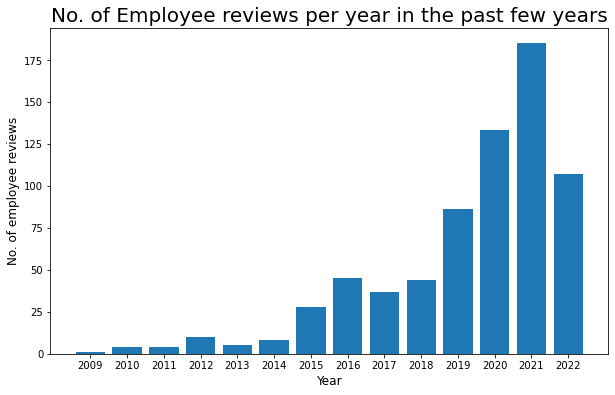

In [1465]:
year_count = pd.DataFrame(new_data.groupby(["year"]).count()["date_original"]).reset_index()

plt.figure(figsize=(10,6))
plt.bar(year_count["year"], year_count["date_original"])
plt.title("No. of Employee reviews per year in the past few years", fontsize = 20, **csfont)
plt.xlabel("Year", fontsize = "12")
plt.ylabel("No. of employee reviews", fontsize = "12");

In [814]:
data_2022 = new_data[new_data["year"] == "2022"].reset_index()
data_2021 = new_data[new_data["year"] == "2021"].reset_index()
data_2020 = new_data[new_data["year"] == "2020"].reset_index()
data_2019 = new_data[new_data["year"] == "2019"].reset_index()

data_2022.drop("index", axis=1, inplace=True)
data_2021.drop("index", axis=1, inplace=True)
data_2020.drop("index", axis=1, inplace=True)
data_2019.drop("index", axis=1, inplace=True)

In [815]:
pd.DataFrame(data={"year": (2022,2021,2020, 2019), "no. of reviews":(len(data_2022), len(data_2021), len(data_2020), len(data_2019))})

,year,no. of reviews
0,2022,107
1,2021,185
2,2020,133
3,2019,86


In [816]:
data_2022.designation.nunique()

84

In [817]:
# In the year 2022, out of 107 reviews, 84 people were of different designation.

In [818]:
data_2022["designation"].unique()

array(['Delivery Manager', 'Retired', 'Ops Manager', 'Anonymous Employee',
       'Debt Advisor', 'Systems Administrator', 'Finance Analyst',
       'QA Analyst', 'Engineer', 'Client Relations Manager',
       'MI Developer', 'Field Service Engineer', 'Senior Data Scientist',
       'Office Assistant', 'Graduate Analyst', 'Customer Service Agent',
       'Devops Engineer', 'Development Manager', 'Heating Engineer',
       'Commercial Marketing Graduate Scheme', 'Data Scientist',
       'Senior Mechanical Design Engineer',
       'Customer Service Representative', 'Product Manager', 'Manager',
       'Planner/Scheduler', 'Scrum Master', 'Customer Manager',
       'Commercial Analyst', 'Project Manager',
       'Head of Assurance & Compliance', 'Field Manager',
       'Call Center Agent', 'Process Improvement Manager',
       'Customer Service Advisor', 'Finance Director',
       'Business Change Manager', 'Internal Recruiter', 'Site Manager',
       'Graduate Commercial Analyst',
      

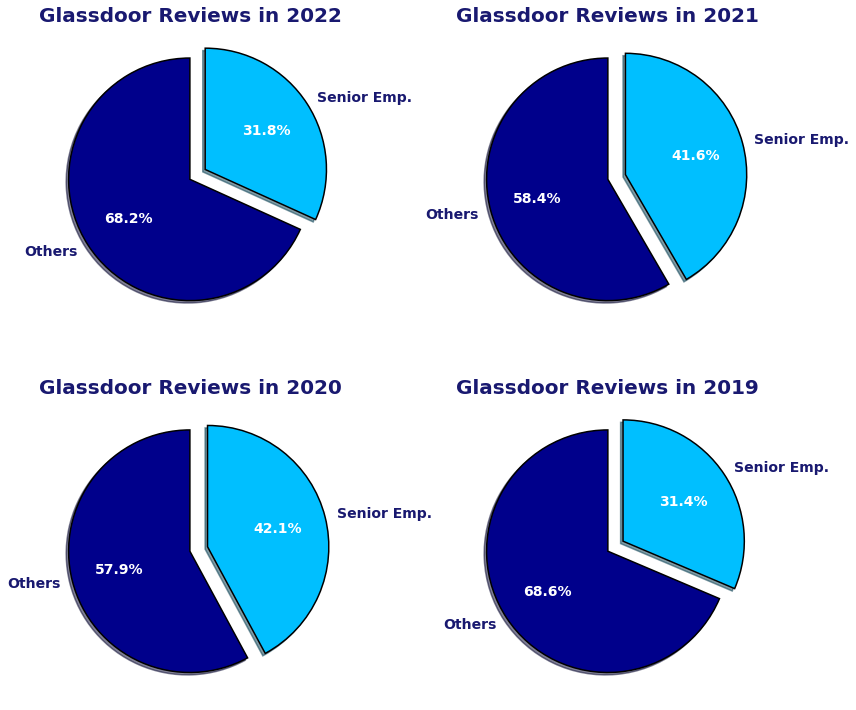

In [1571]:
fig, ax = plt.subplots(2, 2, figsize = (12,12))

# Senior level in 2022 

sizes_data_2022 = data_2022.groupby(["senior_level"]).count()["designation"]
labels_data_2022 = ['Others', 'Senior Emp.']
explode_data_2022 = (0, 0.15)
colors_data_2022 = ['darkblue', 'deepskyblue']

patches, texts, autotexts = ax[0,0].pie(sizes_data_2022,
       explode=explode_data_2022,
       labels=labels_data_2022,
       colors=colors_data_2022,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90,
       textprops={"fontsize": 14, "color": "white", "fontweight": "bold"}, 
            wedgeprops = {"linewidth":1.5, "edgecolor":"black"})
ax[0,0].set_title("Glassdoor Reviews in 2022", fontsize = 20, color = "midnightblue", fontweight = "bold")
plt.setp(texts, color='midnightblue', fontweight='bold')
plt.tight_layout();


# Senior level in 2021

sizes_data_2021 = data_2021.groupby(["senior_level"]).count()["designation"]
labels_data_2021 = ['Others', 'Senior Emp.']
explode_data_2021 = (0, 0.15)
colors_data_2021 = ['darkblue', 'deepskyblue']

patches, texts, autotexts = ax[0,1].pie(sizes_data_2021,
       explode=explode_data_2021,
       labels=labels_data_2021,
       colors=colors_data_2021,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90,
       textprops={"fontsize": 14, "color": "white", "fontweight": "bold"}, 
            wedgeprops = {"linewidth":1.5, "edgecolor":"black"})
ax[0,1].set_title("Glassdoor Reviews in 2021", fontsize = 20, color = "midnightblue", fontweight = "bold")
plt.setp(texts, color='midnightblue', fontweight='bold')
plt.tight_layout();


# Senior level in 2020 

sizes_data_2020 = data_2020.groupby(["senior_level"]).count()["designation"]
labels_data_2020 = ['Others', 'Senior Emp.']
explode_data_2020 = (0, 0.15)
colors_data_2020 = ['darkblue', 'deepskyblue']

patches, texts, autotexts = ax[1,0].pie(sizes_data_2020,
       explode=explode_data_2020,
       labels=labels_data_2020,
       colors=colors_data_2020,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90,
       textprops={"fontsize": 14, "color": "white", "fontweight": "bold"}, 
            wedgeprops = {"linewidth":1.5, "edgecolor":"black"})
ax[1,0].set_title("Glassdoor Reviews in 2020", fontsize = 20, color = "midnightblue", fontweight = "bold")
plt.setp(texts, color='midnightblue', fontweight='bold')
plt.tight_layout();


# Senior level in 2019 

sizes_data_2019 = data_2019.groupby(["senior_level"]).count()["designation"]
labels_data_2019 = ['Others', 'Senior Emp.']
explode_data_2019 = (0, 0.15)
colors_data_2019 = ['darkblue', 'deepskyblue']

patches, texts, autotexts = ax[1,1].pie(sizes_data_2019,
       explode=explode_data_2019,
       labels=labels_data_2019,
       colors=colors_data_2019,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90,
       textprops={"fontsize": 14, "color": "white", "fontweight": "bold"}, 
            wedgeprops = {"linewidth":1.5, "edgecolor":"black"})
ax[1,1].set_title("Glassdoor Reviews in 2019", fontsize = 20, color = "midnightblue", fontweight = "bold")
plt.setp(texts, color='midnightblue', fontweight='bold')
plt.tight_layout();

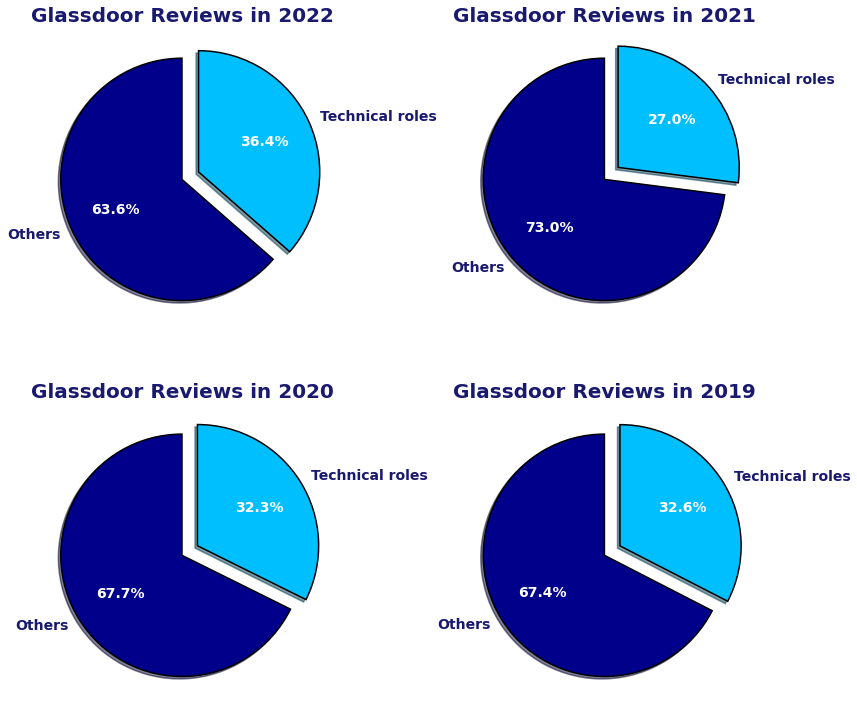

In [1572]:
fig, ax = plt.subplots(2, 2, figsize = (12,12))

# Technical role in 2022 

sizes_data_2022_tech = data_2022.groupby(["technical_role"]).count()["designation"]
labels_data_2022_tech = ['Others', 'Technical roles']
explode_data_2022_tech = (0, 0.15)
colors_data_2022_tech = ['darkblue', 'deepskyblue']

patches, texts, autotexts = ax[0,0].pie(sizes_data_2022_tech,
       explode=explode_data_2022_tech,
       labels=labels_data_2022_tech,
       colors=colors_data_2022_tech,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90,
       textprops={"fontsize": 14, "color": "white", "fontweight": "bold"}, 
            wedgeprops = {"linewidth":1.5, "edgecolor":"black"})
ax[0,0].set_title("Glassdoor Reviews in 2022", fontsize = 20, color = "midnightblue", fontweight = "bold")
plt.setp(texts, color='midnightblue', fontweight='bold')
plt.tight_layout();


# Technical role in 2021

sizes_data_2021_tech = data_2021.groupby(["technical_role"]).count()["designation"]
labels_data_2021_tech = ['Others', 'Technical roles']
explode_data_2021_tech = (0, 0.15)
colors_data_2021_tech = ['darkblue', 'deepskyblue']

patches, texts, autotexts = ax[0,1].pie(sizes_data_2021_tech,
       explode=explode_data_2021_tech,
       labels=labels_data_2021_tech,
       colors=colors_data_2021_tech,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90,
       textprops={"fontsize": 14, "color": "white", "fontweight": "bold"}, 
            wedgeprops = {"linewidth":1.5, "edgecolor":"black"})
ax[0,1].set_title("Glassdoor Reviews in 2021", fontsize = 20, color = "midnightblue", fontweight = "bold")
plt.setp(texts, color='midnightblue', fontweight='bold')
plt.tight_layout();


# Technical role in 2020 

sizes_data_2020_tech = data_2020.groupby(["technical_role"]).count()["designation"]
labels_data_2020_tech = ['Others', 'Technical roles']
explode_data_2020_tech = (0, 0.15)
colors_data_2020_tech = ['darkblue', 'deepskyblue']

patches, texts, autotexts = ax[1,0].pie(sizes_data_2020_tech,
       explode=explode_data_2020_tech,
       labels=labels_data_2020_tech,
       colors=colors_data_2020_tech,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90,
       textprops={"fontsize": 14, "color": "white", "fontweight": "bold"}, 
            wedgeprops = {"linewidth":1.5, "edgecolor":"black"})
ax[1,0].set_title("Glassdoor Reviews in 2020", fontsize = 20, color = "midnightblue", fontweight = "bold")
plt.setp(texts, color='midnightblue', fontweight='bold')
plt.tight_layout();


# Technical role in 2019 

sizes_data_2019_tech = data_2019.groupby(["technical_role"]).count()["designation"]
labels_data_2019_tech = ['Others', 'Technical roles']
explode_data_2019_tech = (0, 0.15)
colors_data_2019_tech = ['darkblue', 'deepskyblue']

patches, texts, autotexts = ax[1,1].pie(sizes_data_2019_tech,
       explode=explode_data_2019_tech,
       labels=labels_data_2019_tech,
       colors=colors_data_2019_tech,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90,
       textprops={"fontsize": 14, "color": "white", "fontweight": "bold"}, 
            wedgeprops = {"linewidth":1.5, "edgecolor":"black"})
ax[1,1].set_title("Glassdoor Reviews in 2019", fontsize = 20, color = "midnightblue", fontweight = "bold")
plt.setp(texts, color='midnightblue', fontweight='bold')
plt.tight_layout();

### Categorisation Metrics for Employee Experience

In [1573]:
new_data

,employee_reference,employee_status,employee_working_from,headline,rating,date_original,year,designation,pros,cons,senior_level,technical_role
0,1,Current Employee,more than 8 years,Great company to work for,5,11/10/2022,2022,Delivery Manager,Great flexibility and support and working cult...,Too many re-orgs always looking to simplify th...,1,0
1,2,Former Employee,0,Centrica Decline,4,12/10/2022,2022,Retired,The company used to employ long-term employees...,The company slowly made most of the experience...,0,0
2,3,Current Employee,more than 10 years,OPs manager,5,10/10/2022,2022,Ops Manager,Great flexible work life balance,Dont have a good development structure in place,1,0
3,4,Former Employee,0,"Great organisation, but has gone through lots ...",4,05/10/2022,2022,Anonymous Employee,"Nice office environment, benefits, development...",Went through a lot of strategic and organisati...,0,0
4,5,Current Employee,more than 3 years,Cares about it’s staff and customers,5,03/10/2022,2022,Debt Advisor,"Work from home, supportive, forward thinking, ...","None, it’s a good place to work",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
692,693,Current Employee,less than 1 year,Geologist,3,14/08/2015,2015,Anonymous Employee,Great people good work and balance,Challenging work flows due to IT mismanagement,0,0
693,694,Current Employee,more than 3 years,Could have been better organisation...,2,30/07/2012,2012,Business Development Manager,Good Parent company to work for depending on w...,Some offices and P&L's not managed well and th...,1,0
694,695,Former Employee,0,Painful,2,04/05/2012,2012,Anonymous Employee,Good colleagues to work with,Senior management has poor capabilities,0,0
695,696,Current Employee,0,Good development opportunity,4,18/09/2011,2011,Anonymous Employee,Various types of jobs available. Good corporat...,Salary not as high as competitors. \ \ \ \ \ \...,0,0


In [1574]:
test_data = new_data[new_data["senior_level"] == 1 ].reset_index()
test_data.drop(columns="index", inplace=True)
test_data

,employee_reference,employee_status,employee_working_from,headline,rating,date_original,year,designation,pros,cons,senior_level,technical_role
0,1,Current Employee,more than 8 years,Great company to work for,5,11/10/2022,2022,Delivery Manager,Great flexibility and support and working cult...,Too many re-orgs always looking to simplify th...,1,0
1,3,Current Employee,more than 10 years,OPs manager,5,10/10/2022,2022,Ops Manager,Great flexible work life balance,Dont have a good development structure in place,1,0
2,10,Former Employee,more than 5 years,Great company to work for!,5,16/09/2022,2022,Client Relations Manager,Excellent benefits\r\nGreat team environment\r...,Lack of growth in certain roles,1,0
3,14,Former Employee,more than 8 years,Office Politics - Do Not Work For,1,03/10/2022,2022,Senior Data Scientist,- Work From Home is encouraged. Flexible worki...,- Office politics and cronyism. You have to be...,1,1
4,21,Former Employee,more than 8 years,Company with potential,4,10/08/2022,2022,Development Manager,Very good work life balance,Capital misallocation\r\nLittle to no career path,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
229,676,Current Employee,0,5 years working for Centrica,3,17/05/2019,2019,Programmer Manager,Good salary\r\nOpportunities within the same l...,No career progression and failing strategy\r\n...,1,0
230,678,Current Employee,more than 8 years,Relationship Manager,2,21/02/2019,2019,Business Relationship Manager,"people, locations not much else","no real flexi working, poor benefits, very pol...",1,0
231,679,Former Employee,more than 1 year,Fake News,1,07/03/2019,2019,Business Development Manager,Above average pay and benefits.,Management is clueless\r\nCompany is run to ap...,1,0
232,689,Former Employee,0,Senior Buyer,5,04/07/2016,2016,Senior Buyer,Excellent management with clear vision that is...,The company is leaving Canada as result of the...,1,0


### Text Analytics - Begin

In [1576]:
new_data["career_progression"] = 0
new_data["trust_in_leadership"] = 0
new_data["others"] = 0
new_data["no_cons"] = 0
new_data["salary_issues"] = 0
new_data["location_issues"] = 0
new_data["stress_pressure"] = 0

### No cons

In [1577]:
for i in range(0, len(new_data)):
    if "none" in new_data["cons"][i].lower() or "enjoy" in new_data[
            "cons"][i].lower() or "no complaint" in new_data["cons"][i].lower(
            ) or "nope" in new_data["cons"][i].lower(
            ) or "not many" in new_data["cons"][i].lower(
            ) or "nothing really" in new_data["cons"][i].lower(
            ) or "didn't find any" in new_data["cons"][i].lower(
            ) or "no cons " in new_data["cons"][i].lower(
            ) or "can’t think" in new_data["cons"][i].lower(
            ) or "no comment" in new_data["cons"][i].lower(
            ) or "everything is good" in new_data["cons"][i].lower() or (
                "nothing" in new_data["cons"][i].lower()
                and "negative" in new_data["cons"][i].lower()
            ) or "no specific cons" in new_data["cons"][i].lower(
            ) or "nothing as such" in new_data["cons"][i].lower(
            ) or "nothing major" in new_data["cons"][i].lower(
            ) or "excellent" in new_data["cons"][i].lower(
            ) or "yet to come across downsides" in new_data["cons"][i].lower(
            ) or "nothing to report" in new_data["cons"][i].lower(
            ) or "not much to add" in new_data["cons"][i].lower() or (
                "nothing" in new_data["cons"][i].lower()
                and "comes to mind" in new_data["cons"][i].lower()):
        new_data["no_cons"][i] = new_data["employee_reference"][i]

count_no_cons = 0

for i in range(0, len(new_data)):
    if new_data["no_cons"][i] != 0:
        count_no_cons += 1

print("\n")
print(
    f"{count_no_cons} people think it is enjoyble to work at the company and has no cons."
)

/var/folders/x9/w7h81k192ql2wzm01qg2h8_00000gn/T/ipykernel_29252/2945715394.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["no_cons"][i] = new_data["employee_reference"][i]




43 people think it is enjoyble to work at the company and has no cons.


### Clear pathways to Career Progression

In [1578]:
for i in range(0, len(new_data)):
    if ("career" in new_data["cons"][i].lower() and
        ("path" in new_data["cons"][i].lower())
        ) or "career" in new_data["cons"][i].lower() or "grow" in new_data[
            "cons"][i].lower() or "progress" in new_data["cons"][i].lower(
            ) or "develop" in new_data["cons"][i].lower(
            ) or "learning" in new_data["cons"][i].lower(
            ) or "train" in new_data["cons"][i].lower(
            ) or "redund" in new_data["cons"][i].lower(
            ) or "opportunit" in new_data["cons"][i].lower(
            ) or "support" in new_data["cons"][i].lower(
            ) or "structur" in new_data["cons"][i].lower(
            ) or "innov" in new_data["cons"][i].lower() or "reorg" in new_data[
                "cons"][i].lower() or "re-org" in new_data["cons"][i].lower(
                ) or "restruct" in new_data["cons"][i].lower(
                ) or "re-struct" in new_data["cons"][i].lower():
        new_data["career_progression"][i] = new_data["employee_reference"][i]

count_progression = 0

for i in range(0, len(new_data)):
    if new_data["career_progression"][i] != 0:
        count_progression += 1

print("\n")
print(
    f"{count_progression} people people think it is difficult to grow within the company."
)

/var/folders/x9/w7h81k192ql2wzm01qg2h8_00000gn/T/ipykernel_29252/2030517564.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["career_progression"][i] = new_data["employee_reference"][i]




222 people people think it is difficult to grow within the company.


### Trust in Management

In [1579]:
for i in range(0, len(new_data)):
    if "lead" in new_data["cons"][i].lower() or "manager" in new_data["cons"][
            i].lower() or "management" in new_data["cons"][i].lower(
            ) or "politic" in new_data["cons"][i].lower(
            ) or "favorit" in new_data["cons"][i].lower(
            ) or "unfair" in new_data["cons"][i].lower(
            ) or "useless" in new_data["cons"][i].lower(
            ) or "control" in new_data["cons"][i].lower(
            ) or "structur" in new_data["cons"][i].lower(
            ) or "strateg" in new_data["cons"][i].lower(
            ) or "direct" in new_data["cons"][i].lower(
            ) or "decis" in new_data["cons"][i].lower() or "recog" in new_data[
                "cons"][i].lower() or "bully" in new_data["cons"][i].lower(
                ) or "cultur" in new_data["cons"][i].lower(
                ) or "slow" in new_data["cons"][i].lower(
                ) or "disorganiz" in new_data["cons"][i].lower(
                ) or "team" in new_data["cons"][i].lower(
                ) or "people" in new_data["cons"][i].lower(
                ) or "chang" in new_data["cons"][i].lower(
                ) or "staff" in new_data["cons"][i].lower(
                ) or "proces" in new_data["cons"][i].lower(
                ) or "compan" in new_data["cons"][i].lower(
                ) or "unclear" in new_data["cons"][i].lower(
                ) or "position" in new_data["cons"][i].lower(
                ) or "future" in new_data["cons"][i].lower(
                ) or "job security" in new_data["cons"][i].lower(
                ) or "toxic" in new_data["cons"][i].lower(
                ) or "hierarch" in new_data["cons"][i].lower(
                ) or "boss" in new_data["cons"][i].lower(
                ) or "downsiz" in new_data["cons"][i].lower(
                ) or "cost cut" in new_data["cons"][i].lower(
                ) or "job cut" in new_data["cons"][i].lower(
                ) or "employee" in new_data["cons"][i].lower(
                ) or "bureaucrat" in new_data["cons"][i].lower(
                ) or "mysogyn" in new_data["cons"][i].lower():
        new_data["trust_in_leadership"][i] = new_data["employee_reference"][i]

count_leadership = 0

for i in range(0, len(new_data)):
    if new_data["trust_in_leadership"][i] != 0:
        count_leadership += 1

print("\n")
print(f"{count_leadership} people had issues with the management in the past.")

/var/folders/x9/w7h81k192ql2wzm01qg2h8_00000gn/T/ipykernel_29252/3970903861.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["trust_in_leadership"][i] = new_data["employee_reference"][i]




459 people had issues with the management in the past.


### Salary

In [1580]:
for i in range(0, len(new_data)):
    if "salar" in new_data["cons"][i].lower() or "hike" in new_data["cons"][
            i].lower() or "pay" in new_data["cons"][i].lower(
            ) or "wage" in new_data["cons"][i].lower() or "bonus" in new_data[
                "cons"][i].lower() or "underpa" in new_data["cons"][i].lower(
                ) or "remunera" in new_data["cons"][i].lower(
                ) or "allowance" in new_data["cons"][i].lower():
        new_data["salary_issues"][i] = new_data["employee_reference"][i]

count_salary = 0

for i in range(0, len(new_data)):
    if new_data["salary_issues"][i] != 0:
        count_salary += 1

print("\n")
print(f"{count_salary} people have salary issues with the company.")

/var/folders/x9/w7h81k192ql2wzm01qg2h8_00000gn/T/ipykernel_29252/1263111846.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["salary_issues"][i] = new_data["employee_reference"][i]




76 people have salary issues with the company.


### Location issues

In [1581]:
for i in range(0, len(new_data)):
    if "location" in new_data["cons"][i].lower():
        new_data["location_issues"][i] = new_data["employee_reference"][i]

count_location = 0

for i in range(0, len(new_data)):
    if new_data["location_issues"][i] != 0:
        count_location += 1

print("\n")
print(f"{count_location} people have issues with their location.")



15 people have issues with their location.


/var/folders/x9/w7h81k192ql2wzm01qg2h8_00000gn/T/ipykernel_29252/1491268718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["location_issues"][i] = new_data["employee_reference"][i]


### Stress and pressure

In [1582]:
for i in range(0, len(new_data)):
    if "pressure" in new_data["cons"][i].lower() or "target" in new_data[
            "cons"][i].lower() or "stress" in new_data["cons"][i].lower() or (
                "work" in new_data["cons"][i].lower()
                and "life" in new_data["cons"][i].lower()
                and "balance" in new_data["cons"][i].lower()
            ) or "travel" in new_data["cons"][i].lower(
            ) or "challeng" in new_data["cons"][i].lower(
            ) or "difficult" in new_data["cons"][i].lower(
            ) or "busy" in new_data["cons"][i].lower(
            ) or "deadline" in new_data["cons"][i].lower(
            ) or "intense" in new_data["cons"][i].lower(
            ) or "hour" in new_data["cons"][i].lower(
            ) or "frustrat" in new_data["cons"][i].lower():
        new_data["stress_pressure"][i] = new_data["employee_reference"][i]

count_sp = 0

for i in range(0, len(new_data)):
    if new_data["stress_pressure"][i] != 0:
        count_sp += 1

print("\n")
print(f"{count_sp} people think that the work is too much.")

/var/folders/x9/w7h81k192ql2wzm01qg2h8_00000gn/T/ipykernel_29252/992724926.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["stress_pressure"][i] = new_data["employee_reference"][i]




104 people think that the work is too much.


### Others

In [1583]:
for i in range(0, len(new_data)):
    if new_data["career_progression"][i] != 0 or new_data[
            "trust_in_leadership"][i] != 0 or new_data["no_cons"][
                i] != 0 or new_data["salary_issues"][i] != 0 or new_data[
                    "location_issues"][i] != 0 or new_data[
                        "stress_pressure"][i] != 0:
        new_data["others"][i] = 0
    else:
        new_data["others"][i] = new_data["employee_reference"][i]

count_others = 0

for i in range(0, len(new_data)):
    if new_data["others"][i] != 0:
        count_others += 1

print("\n")
print(f"{count_others} comments do not fall under the most common categories.")

/var/folders/x9/w7h81k192ql2wzm01qg2h8_00000gn/T/ipykernel_29252/1843626657.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["others"][i] = 0
/var/folders/x9/w7h81k192ql2wzm01qg2h8_00000gn/T/ipykernel_29252/1843626657.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["others"][i] = new_data["employee_reference"][i]




66 comments do not fall under the most common categories.


### Venn diagram

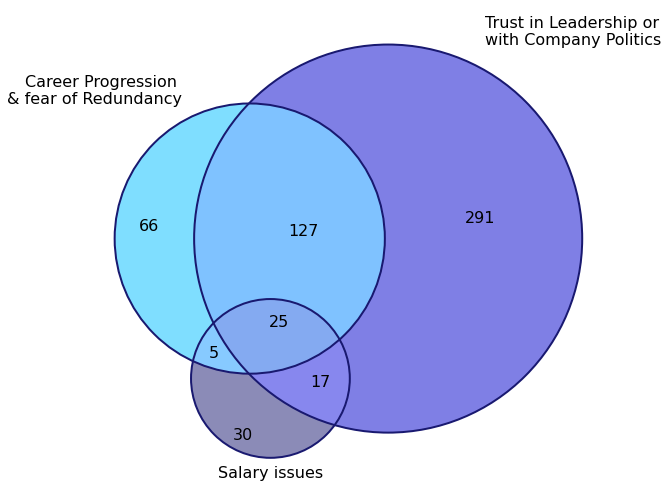

In [1645]:
plt.figure(figsize=(15, 9))

venn_diagram = venn3(
    [
        set(new_data["career_progression"]),
        set(new_data["trust_in_leadership"]),
        set(new_data["salary_issues"])
    ],
    set_labels=("Career Progression \n& fear of Redundancy",
                "Trust in Leadership or \nwith Company Politics",
                "Salary issues"),
    set_colors=('deepskyblue', 'mediumblue', "midnightblue"),
    alpha=0.5
)

for text in venn_diagram.set_labels:
    text.set_fontsize(16)
for text in venn_diagram.subset_labels:
    text.set_fontsize(16)

venn3_circles([
    set(new_data["career_progression"]),
    set(new_data["trust_in_leadership"]),
    set(new_data["salary_issues"])
],
              linestyle="-",
              linewidth=2,
              color="midnightblue")

#plt.title("Venn Diagram for negative reviews", fontweight="bold", fontsize=20)
plt.show()

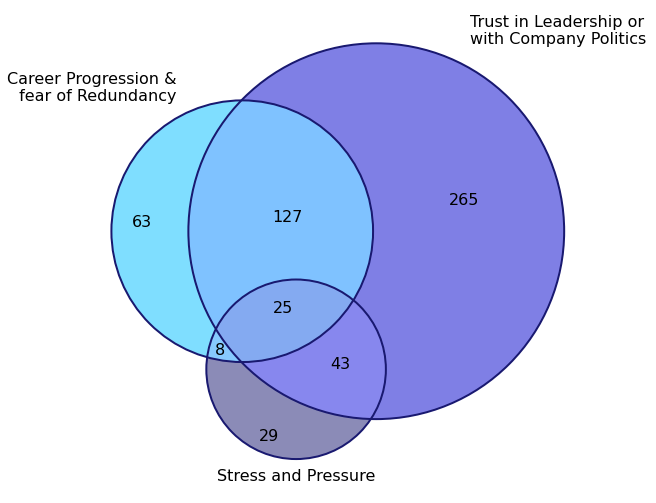

In [1630]:
plt.figure(figsize=(15, 9))

venn_diagram = venn3(
    [
        set(new_data["career_progression"]),
        set(new_data["trust_in_leadership"]),
        set(new_data["stress_pressure"])
    ],
    set_labels=("Career Progression &\n fear of Redundancy",
                "Trust in Leadership or \nwith Company Politics",
                "Stress and Pressure"),
    alpha=0.5, set_colors=('deepskyblue', 'mediumblue', "midnightblue")
)

for text in venn_diagram.set_labels:
    text.set_fontsize(16)
for text in venn_diagram.subset_labels:
    text.set_fontsize(16)

venn3_circles([
    set(new_data["career_progression"]),
    set(new_data["trust_in_leadership"]),
    set(new_data["stress_pressure"])
],
              linestyle="-",
              linewidth=2,
              color="midnightblue")

#plt.title("Venn Diagram for negative reviews", fontweight="bold", fontsize=20)
plt.show()

In [1646]:
new_data["senior_level_venn"] = 0
new_data["technical_role_venn"] = 0

for i in range(1, len(new_data)):
    if new_data["senior_level"][i] != 0:
        new_data["senior_level_venn"][i] = new_data["employee_reference"][i]
        
for i in range(1, len(new_data)):
    if new_data["technical_role"][i] != 0:
        new_data["technical_role_venn"][i] = new_data["employee_reference"][i]

/var/folders/x9/w7h81k192ql2wzm01qg2h8_00000gn/T/ipykernel_29252/3240911580.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["senior_level_venn"][i] = new_data["employee_reference"][i]
/var/folders/x9/w7h81k192ql2wzm01qg2h8_00000gn/T/ipykernel_29252/3240911580.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["technical_role_venn"][i] = new_data["employee_reference"][i]


In [1647]:
new_data

,employee_reference,employee_status,employee_working_from,headline,rating,date_original,year,designation,pros,cons,...,technical_role,career_progression,trust_in_leadership,others,no_cons,salary_issues,location_issues,stress_pressure,senior_level_venn,technical_role_venn
0,1,Current Employee,more than 8 years,Great company to work for,5,11/10/2022,2022,Delivery Manager,Great flexibility and support and working cult...,Too many re-orgs always looking to simplify th...,...,0,1,0,0,0,0,0,0,0,0
1,2,Former Employee,0,Centrica Decline,4,12/10/2022,2022,Retired,The company used to employ long-term employees...,The company slowly made most of the experience...,...,0,2,2,0,0,0,0,0,0,0
2,3,Current Employee,more than 10 years,OPs manager,5,10/10/2022,2022,Ops Manager,Great flexible work life balance,Dont have a good development structure in place,...,0,3,3,0,0,0,0,0,3,0
3,4,Former Employee,0,"Great organisation, but has gone through lots ...",4,05/10/2022,2022,Anonymous Employee,"Nice office environment, benefits, development...",Went through a lot of strategic and organisati...,...,0,0,4,0,0,0,0,0,0,0
4,5,Current Employee,more than 3 years,Cares about it’s staff and customers,5,03/10/2022,2022,Debt Advisor,"Work from home, supportive, forward thinking, ...","None, it’s a good place to work",...,0,0,0,0,5,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,693,Current Employee,less than 1 year,Geologist,3,14/08/2015,2015,Anonymous Employee,Great people good work and balance,Challenging work flows due to IT mismanagement,...,0,0,693,0,0,0,0,693,0,0
693,694,Current Employee,more than 3 years,Could have been better organisation...,2,30/07/2012,2012,Business Development Manager,Good Parent company to work for depending on w...,Some offices and P&L's not managed well and th...,...,0,694,694,0,0,0,0,0,694,0
694,695,Former Employee,0,Painful,2,04/05/2012,2012,Anonymous Employee,Good colleagues to work with,Senior management has poor capabilities,...,0,0,695,0,0,0,0,0,0,0
695,696,Current Employee,0,Good development opportunity,4,18/09/2011,2011,Anonymous Employee,Various types of jobs available. Good corporat...,Salary not as high as competitors. \ \ \ \ \ \...,...,0,0,0,0,0,696,0,0,0,0


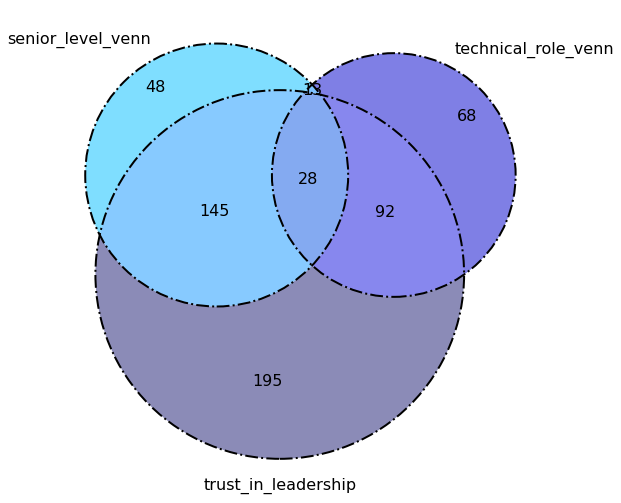

In [1650]:
plt.figure(figsize=(15, 9))

venn_diagram = venn3(
    [
        set(new_data["senior_level_venn"]),
        set(new_data["technical_role_venn"]),
        set(new_data["trust_in_leadership"])
    ],
    set_labels=("senior_level_venn",
                "technical_role_venn",
                "trust_in_leadership"),
    alpha=0.5, set_colors=('deepskyblue', 'mediumblue', "midnightblue")
)

for text in venn_diagram.set_labels:
    text.set_fontsize(16)
for text in venn_diagram.subset_labels:
    text.set_fontsize(16)

venn3_circles([
    set(new_data["senior_level_venn"]),
    set(new_data["technical_role_venn"]),
    set(new_data["trust_in_leadership"])
],
              linestyle="-.",
              linewidth=2,
              color="black")

#plt.title("Venn Diagram for negative reviews", fontweight="bold", fontsize=20)
plt.show()

### Senior Employees

In [1748]:
df_senior_trial = pd.DataFrame(
    data={
        "senior": new_data["senior_level"],
        "employee_type": new_data["employee_status"],
        "leadership_trust": new_data["trust_in_leadership"],
        "career_progression": new_data["career_progression"],
        "salary": new_data["salary_issues"],
        "stress_pressure": new_data["stress_pressure"],
        "working_from": new_data["employee_working_from"],
        "rating": new_data["rating"]
    })

df_senior_trial = df_senior_trial.loc[df_senior_trial["senior"] != 0]
df_senior_trial.drop(columns={"senior"}, inplace=True)
df_senior_trial.reset_index(inplace=True)
df_senior_trial.drop(columns={"index"}, inplace=True)

for i in range(0, len(df_senior_trial)):
    if df_senior_trial["leadership_trust"][i] != 0:
        df_senior_trial["leadership_trust"][i] = 1

        
for i in range(0, len(df_senior_trial)):
    if df_senior_trial["career_progression"][i] != 0:
        df_senior_trial["career_progression"][i] = 1

        
for i in range(0, len(df_senior_trial)):
    if df_senior_trial["salary"][i] != 0:
        df_senior_trial["salary"][i] = 1


for i in range(0, len(df_senior_trial)):
    if df_senior_trial["stress_pressure"][i] != 0:
        df_senior_trial["stress_pressure"][i] = 1

df_senior_trial

/var/folders/x9/w7h81k192ql2wzm01qg2h8_00000gn/T/ipykernel_29252/1843659517.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_senior_trial["leadership_trust"][i] = 1
/var/folders/x9/w7h81k192ql2wzm01qg2h8_00000gn/T/ipykernel_29252/1843659517.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_senior_trial["career_progression"][i] = 1
/var/folders/x9/w7h81k192ql2wzm01qg2h8_00000gn/T/ipykernel_29252/1843659517.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

,employee_type,leadership_trust,career_progression,salary,stress_pressure,working_from,rating
0,Current Employee,0,1,0,0,more than 8 years,5
1,Current Employee,1,1,0,0,more than 10 years,5
2,Former Employee,0,1,0,0,more than 5 years,5
3,Former Employee,1,1,0,0,more than 8 years,1
4,Former Employee,0,1,0,0,more than 8 years,4
...,...,...,...,...,...,...,...
229,Current Employee,1,1,0,0,0,3
230,Current Employee,1,1,0,0,more than 8 years,2
231,Former Employee,1,0,0,0,more than 1 year,1
232,Former Employee,1,0,0,0,0,5


In [1749]:
total_employees = len(new_data["senior_level"])
no_of_senior = len(new_data["senior_level"].loc[new_data["senior_level"] == 1])
pct_senior = no_of_senior/total_employees * 100

total_senior_employees = len(df_senior_trial)
no_of_lead_issues = len(df_senior_trial["leadership_trust"].loc[df_senior_trial["leadership_trust"] == 1])
pct_senior_lead = no_of_lead_issues/total_senior_employees * 100

total_senior_employees = len(df_senior_trial)
no_of_prog_issues = len(df_senior_trial["career_progression"].loc[df_senior_trial["career_progression"] == 1])
pct_senior_prog = no_of_prog_issues/total_senior_employees * 100

total_senior_employees = len(df_senior_trial)
no_of_salary_issues = len(df_senior_trial["salary"].loc[df_senior_trial["salary"] == 1])
pct_senior_salary = no_of_salary_issues/total_senior_employees * 100

total_senior_employees = len(df_senior_trial)
no_of_stress_issues = len(df_senior_trial["stress_pressure"].loc[df_senior_trial["stress_pressure"] == 1])
pct_senior_stress = no_of_stress_issues/total_senior_employees * 100

pct_senior, pct_senior_lead, pct_senior_prog, pct_senior_salary, pct_senior_stress

(33.572453371592545,
 73.50427350427351,
 37.17948717948718,
 8.11965811965812,
 12.82051282051282)

In [1750]:
total_senior_employees_lead = len(
    df_senior_trial.loc[df_senior_trial["leadership_trust"] == 1])

no_of_curr_emp_senior_lead = len(
    df_senior_trial.loc[df_senior_trial["leadership_trust"] == 1].loc[
        df_senior_trial["employee_type"] == "Current Employee"])

no_of_form_emp_senior_lead = len(
    df_senior_trial.loc[df_senior_trial["leadership_trust"] == 1].loc[
        df_senior_trial["employee_type"] == "Former Employee"])

pct_curr_emp_senior_lead = no_of_curr_emp_senior_lead / total_senior_employees_lead * 100
pct_form_emp_senior_lead = no_of_form_emp_senior_lead / total_senior_employees_lead * 100

pct_curr_emp_senior_lead, pct_form_emp_senior_lead

(56.97674418604651, 43.02325581395349)

In [1789]:
rating_lead_senior_curr_1 = len(
    df_senior_trial.loc[df_senior_trial["leadership_trust"] == 1].loc[
        df_senior_trial["employee_type"] == "Current Employee"].loc[
            df_senior_trial["rating"] == 1])

rating_lead_senior_curr_2 = len(
    df_senior_trial.loc[df_senior_trial["leadership_trust"] == 1].loc[
        df_senior_trial["employee_type"] == "Current Employee"].loc[
            df_senior_trial["rating"] == 2])

rating_lead_senior_curr_3 = len(
    df_senior_trial.loc[df_senior_trial["leadership_trust"] == 1].loc[
        df_senior_trial["employee_type"] == "Current Employee"].loc[
            df_senior_trial["rating"] == 3])

rating_lead_senior_curr_4 = len(
    df_senior_trial.loc[df_senior_trial["leadership_trust"] == 1].loc[
        df_senior_trial["employee_type"] == "Current Employee"].loc[
            df_senior_trial["rating"] == 4])

rating_lead_senior_curr_5 = len(
    df_senior_trial.loc[df_senior_trial["leadership_trust"] == 1].loc[
        df_senior_trial["employee_type"] == "Current Employee"].loc[
            df_senior_trial["rating"] == 5])

rating_lead_senior_curr_1 / no_of_curr_emp_senior_lead * 100, rating_lead_senior_curr_2 / no_of_curr_emp_senior_lead * 100, rating_lead_senior_curr_3 / no_of_curr_emp_senior_lead * 100, rating_lead_senior_curr_4/no_of_curr_emp_senior_lead * 100, rating_lead_senior_curr_5/no_of_curr_emp_senior_lead * 100





(8.16326530612245,
 8.16326530612245,
 35.714285714285715,
 35.714285714285715,
 12.244897959183673)

In [1788]:
rating_lead_senior_form_1 = len(
    df_senior_trial.loc[df_senior_trial["leadership_trust"] == 1].loc[
        df_senior_trial["employee_type"] == "Former Employee"].loc[
            df_senior_trial["rating"] == 1])

rating_lead_senior_form_2 = len(
    df_senior_trial.loc[df_senior_trial["leadership_trust"] == 1].loc[
        df_senior_trial["employee_type"] == "Former Employee"].loc[
            df_senior_trial["rating"] == 2])

rating_lead_senior_form_3 = len(
    df_senior_trial.loc[df_senior_trial["leadership_trust"] == 1].loc[
        df_senior_trial["employee_type"] == "Former Employee"].loc[
            df_senior_trial["rating"] == 3])

rating_lead_senior_form_4 = len(
    df_senior_trial.loc[df_senior_trial["leadership_trust"] == 1].loc[
        df_senior_trial["employee_type"] == "Former Employee"].loc[
            df_senior_trial["rating"] == 4])

rating_lead_senior_form_5 = len(
    df_senior_trial.loc[df_senior_trial["leadership_trust"] == 1].loc[
        df_senior_trial["employee_type"] == "Former Employee"].loc[
            df_senior_trial["rating"] == 5])

rating_lead_senior_form_1 / no_of_form_emp_senior_lead * 100, rating_lead_senior_form_2 / no_of_form_emp_senior_lead * 100, rating_lead_senior_form_3 / no_of_form_emp_senior_lead * 100, rating_lead_senior_form_4/no_of_form_emp_senior_lead * 100, rating_lead_senior_form_5/no_of_form_emp_senior_lead * 100





(13.513513513513514,
 17.56756756756757,
 25.675675675675674,
 33.78378378378378,
 9.45945945945946)

In [1751]:
total_senior_employees_career = len(
    df_senior_trial.loc[df_senior_trial["career_progression"] == 1])

no_of_curr_emp_senior_career = len(
    df_senior_trial.loc[df_senior_trial["career_progression"] == 1].loc[
        df_senior_trial["employee_type"] == "Current Employee"])

no_of_form_emp_senior_career = len(
    df_senior_trial.loc[df_senior_trial["career_progression"] == 1].loc[
        df_senior_trial["employee_type"] == "Former Employee"])

pct_curr_emp_senior_career = no_of_curr_emp_senior_career / total_senior_employees_career * 100
pct_form_emp_senior_career = no_of_form_emp_senior_career / total_senior_employees_career * 100

pct_curr_emp_senior_career, pct_form_emp_senior_career

(63.2183908045977, 36.7816091954023)

In [1790]:
rating_prog_senior_curr_1 = len(
    df_senior_trial.loc[df_senior_trial["career_progression"] == 1].loc[
        df_senior_trial["employee_type"] == "Current Employee"].loc[
            df_senior_trial["rating"] == 1])

rating_prog_senior_curr_2 = len(
    df_senior_trial.loc[df_senior_trial["career_progression"] == 1].loc[
        df_senior_trial["employee_type"] == "Current Employee"].loc[
            df_senior_trial["rating"] == 2])

rating_prog_senior_curr_3 = len(
    df_senior_trial.loc[df_senior_trial["career_progression"] == 1].loc[
        df_senior_trial["employee_type"] == "Current Employee"].loc[
            df_senior_trial["rating"] == 3])

rating_prog_senior_curr_4 = len(
    df_senior_trial.loc[df_senior_trial["career_progression"] == 1].loc[
        df_senior_trial["employee_type"] == "Current Employee"].loc[
            df_senior_trial["rating"] == 4])

rating_prog_senior_curr_5 = len(
    df_senior_trial.loc[df_senior_trial["career_progression"] == 1].loc[
        df_senior_trial["employee_type"] == "Current Employee"].loc[
            df_senior_trial["rating"] == 5])

rating_prog_senior_curr_1 / no_of_curr_emp_senior_career * 100, rating_prog_senior_curr_2 / no_of_curr_emp_senior_career * 100, rating_prog_senior_curr_3 / no_of_curr_emp_senior_career * 100, rating_prog_senior_curr_4/no_of_curr_emp_senior_career * 100, rating_prog_senior_curr_5/no_of_curr_emp_senior_career * 100





(7.2727272727272725,
 12.727272727272727,
 38.18181818181819,
 30.909090909090907,
 10.909090909090908)

In [1791]:
rating_prog_senior_form_1 = len(
    df_senior_trial.loc[df_senior_trial["career_progression"] == 1].loc[
        df_senior_trial["employee_type"] == "Former Employee"].loc[
            df_senior_trial["rating"] == 1])

rating_prog_senior_form_2 = len(
    df_senior_trial.loc[df_senior_trial["career_progression"] == 1].loc[
        df_senior_trial["employee_type"] == "Former Employee"].loc[
            df_senior_trial["rating"] == 2])

rating_prog_senior_form_3 = len(
    df_senior_trial.loc[df_senior_trial["career_progression"] == 1].loc[
        df_senior_trial["employee_type"] == "Former Employee"].loc[
            df_senior_trial["rating"] == 3])

rating_prog_senior_form_4 = len(
    df_senior_trial.loc[df_senior_trial["career_progression"] == 1].loc[
        df_senior_trial["employee_type"] == "Former Employee"].loc[
            df_senior_trial["rating"] == 4])

rating_prog_senior_form_5 = len(
    df_senior_trial.loc[df_senior_trial["career_progression"] == 1].loc[
        df_senior_trial["employee_type"] == "Former Employee"].loc[
            df_senior_trial["rating"] == 5])

rating_prog_senior_form_1 / no_of_form_emp_senior_career * 100, rating_prog_senior_form_2 / no_of_form_emp_senior_career * 100, rating_prog_senior_form_3 / no_of_form_emp_senior_career * 100, rating_prog_senior_form_4/no_of_form_emp_senior_career * 100, rating_prog_senior_form_5/no_of_form_emp_senior_career * 100





(9.375, 15.625, 31.25, 31.25, 12.5)

In [1752]:
total_senior_employees_salary = len(
    df_senior_trial.loc[df_senior_trial["salary"] == 1])

no_of_curr_emp_senior_salary = len(
    df_senior_trial.loc[df_senior_trial["salary"] == 1].loc[
        df_senior_trial["employee_type"] == "Current Employee"])

no_of_form_emp_senior_salary = len(
    df_senior_trial.loc[df_senior_trial["salary"] == 1].loc[
        df_senior_trial["employee_type"] == "Former Employee"])

pct_curr_emp_senior_salary = no_of_curr_emp_senior_salary / total_senior_employees_salary * 100
pct_form_emp_senior_salary = no_of_form_emp_senior_salary / total_senior_employees_salary * 100

pct_curr_emp_senior_salary, pct_form_emp_senior_salary

(78.94736842105263, 21.052631578947366)

In [1793]:
rating_salary_senior_curr_1 = len(
    df_senior_trial.loc[df_senior_trial["salary"] == 1].loc[
        df_senior_trial["employee_type"] == "Current Employee"].loc[
            df_senior_trial["rating"] == 1])

rating_salary_senior_curr_2 = len(
    df_senior_trial.loc[df_senior_trial["salary"] == 1].loc[
        df_senior_trial["employee_type"] == "Current Employee"].loc[
            df_senior_trial["rating"] == 2])

rating_salary_senior_curr_3 = len(
    df_senior_trial.loc[df_senior_trial["salary"] == 1].loc[
        df_senior_trial["employee_type"] == "Current Employee"].loc[
            df_senior_trial["rating"] == 3])

rating_salary_senior_curr_4 = len(
    df_senior_trial.loc[df_senior_trial["salary"] == 1].loc[
        df_senior_trial["employee_type"] == "Current Employee"].loc[
            df_senior_trial["rating"] == 4])

rating_salary_senior_curr_5 = len(
    df_senior_trial.loc[df_senior_trial["salary"] == 1].loc[
        df_senior_trial["employee_type"] == "Current Employee"].loc[
            df_senior_trial["rating"] == 5])

rating_salary_senior_curr_1 / no_of_curr_emp_senior_salary * 100, rating_salary_senior_curr_2 / no_of_curr_emp_senior_salary * 100, rating_salary_senior_curr_3 / no_of_curr_emp_senior_salary * 100, rating_salary_senior_curr_4/no_of_curr_emp_senior_salary * 100, rating_salary_senior_curr_5/no_of_curr_emp_senior_salary * 100





(13.333333333333334,
 20.0,
 33.33333333333333,
 26.666666666666668,
 6.666666666666667)

In [1794]:
rating_salary_senior_form_1 = len(
    df_senior_trial.loc[df_senior_trial["salary"] == 1].loc[
        df_senior_trial["employee_type"] == "Former Employee"].loc[
            df_senior_trial["rating"] == 1])

rating_salary_senior_form_2 = len(
    df_senior_trial.loc[df_senior_trial["salary"] == 1].loc[
        df_senior_trial["employee_type"] == "Former Employee"].loc[
            df_senior_trial["rating"] == 2])

rating_salary_senior_form_3 = len(
    df_senior_trial.loc[df_senior_trial["salary"] == 1].loc[
        df_senior_trial["employee_type"] == "Former Employee"].loc[
            df_senior_trial["rating"] == 3])

rating_salary_senior_form_4 = len(
    df_senior_trial.loc[df_senior_trial["salary"] == 1].loc[
        df_senior_trial["employee_type"] == "Former Employee"].loc[
            df_senior_trial["rating"] == 4])

rating_salary_senior_form_5 = len(
    df_senior_trial.loc[df_senior_trial["salary"] == 1].loc[
        df_senior_trial["employee_type"] == "Former Employee"].loc[
            df_senior_trial["rating"] == 5])

rating_salary_senior_form_1 / no_of_form_emp_senior_salary * 100, rating_salary_senior_form_2 / no_of_form_emp_senior_salary * 100, rating_salary_senior_form_3 / no_of_form_emp_senior_salary * 100, rating_salary_senior_form_4/no_of_form_emp_senior_salary * 100, rating_salary_senior_form_5/no_of_form_emp_senior_salary * 100





(0.0, 25.0, 50.0, 25.0, 0.0)

In [1753]:
total_senior_employees_stress_pressure = len(
    df_senior_trial.loc[df_senior_trial["stress_pressure"] == 1])

no_of_curr_emp_senior_stress_pressure = len(
    df_senior_trial.loc[df_senior_trial["stress_pressure"] == 1].loc[
        df_senior_trial["employee_type"] == "Current Employee"])

no_of_form_emp_senior_stress_pressure = len(
    df_senior_trial.loc[df_senior_trial["stress_pressure"] == 1].loc[
        df_senior_trial["employee_type"] == "Former Employee"])

pct_curr_emp_senior_stress_pressure = no_of_curr_emp_senior_stress_pressure / total_senior_employees_stress_pressure * 100
pct_form_emp_senior_stress_pressure = no_of_form_emp_senior_stress_pressure / total_senior_employees_stress_pressure * 100

pct_curr_emp_senior_stress_pressure, pct_form_emp_senior_stress_pressure

(53.333333333333336, 46.666666666666664)

In [1795]:
rating_stress_senior_curr_1 = len(
    df_senior_trial.loc[df_senior_trial["stress_pressure"] == 1].loc[
        df_senior_trial["employee_type"] == "Current Employee"].loc[
            df_senior_trial["rating"] == 1])

rating_stress_senior_curr_2 = len(
    df_senior_trial.loc[df_senior_trial["stress_pressure"] == 1].loc[
        df_senior_trial["employee_type"] == "Current Employee"].loc[
            df_senior_trial["rating"] == 2])

rating_stress_senior_curr_3 = len(
    df_senior_trial.loc[df_senior_trial["stress_pressure"] == 1].loc[
        df_senior_trial["employee_type"] == "Current Employee"].loc[
            df_senior_trial["rating"] == 3])

rating_stress_senior_curr_4 = len(
    df_senior_trial.loc[df_senior_trial["stress_pressure"] == 1].loc[
        df_senior_trial["employee_type"] == "Current Employee"].loc[
            df_senior_trial["rating"] == 4])

rating_stress_senior_curr_5 = len(
    df_senior_trial.loc[df_senior_trial["stress_pressure"] == 1].loc[
        df_senior_trial["employee_type"] == "Current Employee"].loc[
            df_senior_trial["rating"] == 5])

rating_stress_senior_curr_1 / no_of_curr_emp_senior_stress_pressure * 100, rating_stress_senior_curr_2 / no_of_curr_emp_senior_stress_pressure * 100, rating_stress_senior_curr_3 / no_of_curr_emp_senior_stress_pressure * 100, rating_stress_senior_curr_4/no_of_curr_emp_senior_stress_pressure * 100, rating_stress_senior_curr_5/no_of_curr_emp_senior_stress_pressure * 100




(6.25, 0.0, 37.5, 37.5, 18.75)

In [1797]:
rating_stress_senior_form_1 = len(
    df_senior_trial.loc[df_senior_trial["stress_pressure"] == 1].loc[
        df_senior_trial["employee_type"] == "Former Employee"].loc[
            df_senior_trial["rating"] == 1])

rating_stress_senior_form_2 = len(
    df_senior_trial.loc[df_senior_trial["stress_pressure"] == 1].loc[
        df_senior_trial["employee_type"] == "Former Employee"].loc[
            df_senior_trial["rating"] == 2])

rating_stress_senior_form_3 = len(
    df_senior_trial.loc[df_senior_trial["stress_pressure"] == 1].loc[
        df_senior_trial["employee_type"] == "Former Employee"].loc[
            df_senior_trial["rating"] == 3])

rating_stress_senior_form_4 = len(
    df_senior_trial.loc[df_senior_trial["stress_pressure"] == 1].loc[
        df_senior_trial["employee_type"] == "Former Employee"].loc[
            df_senior_trial["rating"] == 4])

rating_stress_senior_form_5 = len(
    df_senior_trial.loc[df_senior_trial["stress_pressure"] == 1].loc[
        df_senior_trial["employee_type"] == "Former Employee"].loc[
            df_senior_trial["rating"] == 5])

rating_stress_senior_form_1 / no_of_form_emp_senior_stress_pressure * 100, rating_stress_senior_form_2 / no_of_form_emp_senior_stress_pressure * 100, rating_stress_senior_form_3 / no_of_form_emp_senior_stress_pressure * 100, rating_stress_senior_form_4/no_of_form_emp_senior_stress_pressure * 100, rating_stress_senior_form_5/no_of_form_emp_senior_stress_pressure * 100




(0.0,
 7.142857142857142,
 28.57142857142857,
 35.714285714285715,
 28.57142857142857)

### Employees with Technical roles

In [1754]:
df_technical_trial = pd.DataFrame(
    data={
        "technical": new_data["technical_role"],
        "employee_type": new_data["employee_status"],
        "leadership_trust": new_data["trust_in_leadership"],
        "career_progression": new_data["career_progression"],
        "salary": new_data["salary_issues"],
        "stress_pressure": new_data["stress_pressure"],
        "working_from": new_data["employee_working_from"],
        "rating": new_data["rating"]
    })

df_technical_trial = df_technical_trial.loc[df_technical_trial["technical"] != 0]
df_technical_trial.drop(columns={"technical"}, inplace=True)
df_technical_trial.reset_index(inplace=True)
df_technical_trial.drop(columns={"index"}, inplace=True)

for i in range(0, len(df_technical_trial)):
    if df_technical_trial["leadership_trust"][i] != 0:
        df_technical_trial["leadership_trust"][i] = 1

        
for i in range(0, len(df_technical_trial)):
    if df_technical_trial["career_progression"][i] != 0:
        df_technical_trial["career_progression"][i] = 1

        
for i in range(0, len(df_technical_trial)):
    if df_technical_trial["salary"][i] != 0:
        df_technical_trial["salary"][i] = 1


for i in range(0, len(df_technical_trial)):
    if df_technical_trial["stress_pressure"][i] != 0:
        df_technical_trial["stress_pressure"][i] = 1

df_technical_trial

/var/folders/x9/w7h81k192ql2wzm01qg2h8_00000gn/T/ipykernel_29252/1027424349.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_technical_trial["leadership_trust"][i] = 1
/var/folders/x9/w7h81k192ql2wzm01qg2h8_00000gn/T/ipykernel_29252/1027424349.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_technical_trial["career_progression"][i] = 1
/var/folders/x9/w7h81k192ql2wzm01qg2h8_00000gn/T/ipykernel_29252/1027424349.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

,employee_type,leadership_trust,career_progression,salary,stress_pressure,working_from,rating
0,Former Employee,1,0,0,0,more than 3 years,3
1,Current Employee,0,0,0,0,0,4
2,Current Employee,0,0,1,0,more than 5 years,5
3,Current Employee,0,0,0,1,more than 5 years,3
4,Current Employee,0,0,1,0,more than 8 years,4
...,...,...,...,...,...,...,...
195,Current Employee,1,0,0,0,more than 3 years,4
196,Former Employee,1,0,0,0,0,4
197,Former Employee,1,1,0,0,more than 1 year,1
198,Former Employee,1,0,0,0,more than 5 years,2


In [1755]:
total_employees = len(new_data["technical_role"])
no_of_technical = len(
    new_data["technical_role"].loc[new_data["technical_role"] == 1])
pct_technical = no_of_technical / total_employees * 100

total_technical_employees = len(df_technical_trial)
no_of_lead_issues = len(df_technical_trial["leadership_trust"].loc[
    df_technical_trial["leadership_trust"] == 1])
pct_technical_lead = no_of_lead_issues / total_technical_employees * 100

total_technical_employees = len(df_technical_trial)
no_of_prog_issues = len(df_technical_trial["career_progression"].loc[
    df_technical_trial["career_progression"] == 1])
pct_technical_prog = no_of_prog_issues / total_technical_employees * 100

total_technical_employees = len(df_technical_trial)
no_of_salary_issues = len(
    df_technical_trial["salary"].loc[df_technical_trial["salary"] == 1])
pct_technical_salary = no_of_salary_issues / total_technical_employees * 100

total_technical_employees = len(df_technical_trial)
no_of_stress_issues = len(df_technical_trial["stress_pressure"].loc[
    df_technical_trial["stress_pressure"] == 1])
pct_technical_stress = no_of_stress_issues / total_technical_employees * 100

pct_technical, pct_technical_lead, pct_technical_prog, pct_technical_salary, pct_technical_stress

(28.694404591104732, 59.5, 32.5, 13.0, 16.0)

In [1756]:
total_technical_employees_lead = len(
    df_technical_trial.loc[df_technical_trial["leadership_trust"] == 1])

no_of_curr_emp_technical_lead = len(
    df_technical_trial.loc[df_technical_trial["leadership_trust"] == 1].loc[
        df_technical_trial["employee_type"] == "Current Employee"])

no_of_form_emp_technical_lead = len(
    df_technical_trial.loc[df_technical_trial["leadership_trust"] == 1].loc[
        df_technical_trial["employee_type"] == "Former Employee"])

pct_curr_emp_technical_lead = no_of_curr_emp_technical_lead / total_technical_employees_lead * 100
pct_form_emp_technical_lead = no_of_form_emp_technical_lead / total_technical_employees_lead * 100

pct_curr_emp_technical_lead, pct_form_emp_technical_lead

(62.18487394957983, 37.81512605042017)

In [1780]:
rating_lead_tech_curr_1 = len(
    df_technical_trial.loc[df_technical_trial["leadership_trust"] == 1].loc[
        df_technical_trial["employee_type"] == "Current Employee"].loc[
            df_technical_trial["rating"] == 1])

rating_lead_tech_curr_2 = len(
    df_technical_trial.loc[df_technical_trial["leadership_trust"] == 1].loc[
        df_technical_trial["employee_type"] == "Current Employee"].loc[
            df_technical_trial["rating"] == 2])

rating_lead_tech_curr_3 = len(
    df_technical_trial.loc[df_technical_trial["leadership_trust"] == 1].loc[
        df_technical_trial["employee_type"] == "Current Employee"].loc[
            df_technical_trial["rating"] == 3])

rating_lead_tech_curr_4 = len(
    df_technical_trial.loc[df_technical_trial["leadership_trust"] == 1].loc[
        df_technical_trial["employee_type"] == "Current Employee"].loc[
            df_technical_trial["rating"] == 4])

rating_lead_tech_curr_5 = len(
    df_technical_trial.loc[df_technical_trial["leadership_trust"] == 1].loc[
        df_technical_trial["employee_type"] == "Current Employee"].loc[
            df_technical_trial["rating"] == 5])

rating_lead_tech_curr_1 / no_of_curr_emp_technical_lead * 100, rating_lead_tech_curr_2 / no_of_curr_emp_technical_lead * 100, rating_lead_tech_curr_3 / no_of_curr_emp_technical_lead * 100, rating_lead_tech_curr_4/no_of_curr_emp_technical_lead * 100, rating_lead_tech_curr_5/no_of_curr_emp_technical_lead * 100





(18.91891891891892,
 9.45945945945946,
 32.432432432432435,
 27.027027027027028,
 12.162162162162163)

In [1787]:
rating_lead_tech_form_1 = len(
    df_technical_trial.loc[df_technical_trial["leadership_trust"] == 1].loc[
        df_technical_trial["employee_type"] == "Former Employee"].loc[
            df_technical_trial["rating"] == 1])

rating_lead_tech_form_2 = len(
    df_technical_trial.loc[df_technical_trial["leadership_trust"] == 1].loc[
        df_technical_trial["employee_type"] == "Former Employee"].loc[
            df_technical_trial["rating"] == 2])

rating_lead_tech_form_3 = len(
    df_technical_trial.loc[df_technical_trial["leadership_trust"] == 1].loc[
        df_technical_trial["employee_type"] == "Former Employee"].loc[
            df_technical_trial["rating"] == 3])

rating_lead_tech_form_4 = len(
    df_technical_trial.loc[df_technical_trial["leadership_trust"] == 1].loc[
        df_technical_trial["employee_type"] == "Former Employee"].loc[
            df_technical_trial["rating"] == 4])

rating_lead_tech_form_5 = len(
    df_technical_trial.loc[df_technical_trial["leadership_trust"] == 1].loc[
        df_technical_trial["employee_type"] == "Former Employee"].loc[
            df_technical_trial["rating"] == 5])

rating_lead_tech_form_1 / no_of_form_emp_technical_lead * 100, rating_lead_tech_form_2 / no_of_form_emp_technical_lead * 100, rating_lead_tech_form_3 / no_of_form_emp_technical_lead * 100, rating_lead_tech_form_4/no_of_form_emp_technical_lead * 100, rating_lead_tech_form_5/no_of_form_emp_technical_lead * 100





(22.22222222222222,
 15.555555555555555,
 31.11111111111111,
 22.22222222222222,
 8.88888888888889)

In [1757]:
total_technical_employees_career = len(
    df_technical_trial.loc[df_technical_trial["career_progression"] == 1])

no_of_curr_emp_technical_career = len(
    df_technical_trial.loc[df_technical_trial["career_progression"] == 1].loc[
        df_technical_trial["employee_type"] == "Current Employee"])

no_of_form_emp_technical_career = len(
    df_technical_trial.loc[df_technical_trial["career_progression"] == 1].loc[
        df_technical_trial["employee_type"] == "Former Employee"])

pct_curr_emp_technical_career = no_of_curr_emp_technical_career / total_technical_employees_career * 100
pct_form_emp_technical_career = no_of_form_emp_technical_career / total_technical_employees_career * 100

pct_curr_emp_technical_career, pct_form_emp_technical_career

(63.07692307692307, 36.92307692307693)

In [1783]:
rating_prog_tech_curr_1 = len(
    df_technical_trial.loc[df_technical_trial["career_progression"] == 1].loc[
        df_technical_trial["employee_type"] == "Current Employee"].loc[
            df_technical_trial["rating"] == 1])

rating_prog_tech_curr_2 = len(
    df_technical_trial.loc[df_technical_trial["career_progression"] == 1].loc[
        df_technical_trial["employee_type"] == "Current Employee"].loc[
            df_technical_trial["rating"] == 2])

rating_prog_tech_curr_3 = len(
    df_technical_trial.loc[df_technical_trial["career_progression"] == 1].loc[
        df_technical_trial["employee_type"] == "Current Employee"].loc[
            df_technical_trial["rating"] == 3])

rating_prog_tech_curr_4 = len(
    df_technical_trial.loc[df_technical_trial["career_progression"] == 1].loc[
        df_technical_trial["employee_type"] == "Current Employee"].loc[
            df_technical_trial["rating"] == 4])

rating_prog_tech_curr_5 = len(
    df_technical_trial.loc[df_technical_trial["career_progression"] == 1].loc[
        df_technical_trial["employee_type"] == "Current Employee"].loc[
            df_technical_trial["rating"] == 5])

rating_prog_tech_curr_1 / no_of_curr_emp_technical_career * 100, rating_prog_tech_curr_2 / no_of_curr_emp_technical_career * 100, rating_prog_tech_curr_3 / no_of_curr_emp_technical_career * 100, rating_prog_tech_curr_4/no_of_curr_emp_technical_career * 100, rating_prog_tech_curr_5/no_of_curr_emp_technical_career * 100





(12.195121951219512,
 9.75609756097561,
 41.46341463414634,
 31.70731707317073,
 4.878048780487805)

In [1784]:
rating_prog_tech_form_1 = len(
    df_technical_trial.loc[df_technical_trial["career_progression"] == 1].loc[
        df_technical_trial["employee_type"] == "Former Employee"].loc[
            df_technical_trial["rating"] == 1])

rating_prog_tech_form_2 = len(
    df_technical_trial.loc[df_technical_trial["career_progression"] == 1].loc[
        df_technical_trial["employee_type"] == "Former Employee"].loc[
            df_technical_trial["rating"] == 2])

rating_prog_tech_form_3 = len(
    df_technical_trial.loc[df_technical_trial["career_progression"] == 1].loc[
        df_technical_trial["employee_type"] == "Former Employee"].loc[
            df_technical_trial["rating"] == 3])

rating_prog_tech_form_4 = len(
    df_technical_trial.loc[df_technical_trial["career_progression"] == 1].loc[
        df_technical_trial["employee_type"] == "Former Employee"].loc[
            df_technical_trial["rating"] == 4])

rating_prog_tech_form_5 = len(
    df_technical_trial.loc[df_technical_trial["career_progression"] == 1].loc[
        df_technical_trial["employee_type"] == "Former Employee"].loc[
            df_technical_trial["rating"] == 5])

rating_prog_tech_form_1 / no_of_form_emp_technical_career * 100, rating_prog_tech_form_2 / no_of_form_emp_technical_career * 100, rating_prog_tech_form_3 / no_of_form_emp_technical_career * 100, rating_prog_tech_form_4/no_of_form_emp_technical_career * 100, rating_prog_tech_form_5/no_of_form_emp_technical_career * 100





(16.666666666666664,
 20.833333333333336,
 20.833333333333336,
 33.33333333333333,
 8.333333333333332)

In [1758]:
total_technical_employees_salary = len(
    df_technical_trial.loc[df_technical_trial["salary"] == 1])

no_of_curr_emp_technical_salary = len(
    df_technical_trial.loc[df_technical_trial["salary"] == 1].loc[
        df_technical_trial["employee_type"] == "Current Employee"])

no_of_form_emp_technical_salary = len(
    df_technical_trial.loc[df_technical_trial["salary"] == 1].loc[
        df_technical_trial["employee_type"] == "Former Employee"])

pct_curr_emp_technical_salary = no_of_curr_emp_technical_salary / total_technical_employees_salary * 100
pct_form_emp_technical_salary = no_of_form_emp_technical_salary / total_technical_employees_salary * 100

pct_curr_emp_technical_salary, pct_form_emp_technical_salary

(61.53846153846154, 38.46153846153847)

In [1778]:
rating_salary_tech_form_1 = len(
    df_technical_trial.loc[df_technical_trial["salary"] == 1].loc[
        df_technical_trial["employee_type"] == "Former Employee"].loc[
            df_technical_trial["rating"] == 1])

rating_salary_tech_form_2 = len(
    df_technical_trial.loc[df_technical_trial["salary"] == 1].loc[
        df_technical_trial["employee_type"] == "Former Employee"].loc[
            df_technical_trial["rating"] == 2])

rating_salary_tech_form_3 = len(
    df_technical_trial.loc[df_technical_trial["salary"] == 1].loc[
        df_technical_trial["employee_type"] == "Former Employee"].loc[
            df_technical_trial["rating"] == 3])

rating_salary_tech_form_4 = len(
    df_technical_trial.loc[df_technical_trial["salary"] == 1].loc[
        df_technical_trial["employee_type"] == "Former Employee"].loc[
            df_technical_trial["rating"] == 4])

rating_salary_tech_form_5 = len(
    df_technical_trial.loc[df_technical_trial["salary"] == 1].loc[
        df_technical_trial["employee_type"] == "Former Employee"].loc[
            df_technical_trial["rating"] == 5])

rating_salary_tech_form_1 / no_of_form_emp_technical_salary * 100, rating_salary_tech_form_2 / no_of_form_emp_technical_salary * 100, rating_salary_tech_form_3 / no_of_form_emp_technical_salary * 100, rating_salary_tech_form_4/no_of_form_emp_technical_salary * 100, rating_salary_tech_form_5/no_of_form_emp_technical_salary * 100





(20.0, 20.0, 30.0, 10.0, 20.0)

In [1779]:
rating_salary_tech_curr_1 = len(
    df_technical_trial.loc[df_technical_trial["salary"] == 1].loc[
        df_technical_trial["employee_type"] == "Current Employee"].loc[
            df_technical_trial["rating"] == 1])

rating_salary_tech_curr_2 = len(
    df_technical_trial.loc[df_technical_trial["salary"] == 1].loc[
        df_technical_trial["employee_type"] == "Current Employee"].loc[
            df_technical_trial["rating"] == 2])

rating_salary_tech_curr_3 = len(
    df_technical_trial.loc[df_technical_trial["salary"] == 1].loc[
        df_technical_trial["employee_type"] == "Current Employee"].loc[
            df_technical_trial["rating"] == 3])

rating_salary_tech_curr_4 = len(
    df_technical_trial.loc[df_technical_trial["salary"] == 1].loc[
        df_technical_trial["employee_type"] == "Current Employee"].loc[
            df_technical_trial["rating"] == 4])

rating_salary_tech_curr_5 = len(
    df_technical_trial.loc[df_technical_trial["salary"] == 1].loc[
        df_technical_trial["employee_type"] == "Current Employee"].loc[
            df_technical_trial["rating"] == 5])

rating_salary_tech_curr_1 / no_of_curr_emp_technical_salary * 100, rating_salary_tech_curr_2 / no_of_curr_emp_technical_salary * 100, rating_salary_tech_curr_3 / no_of_curr_emp_technical_salary * 100, rating_salary_tech_curr_4/no_of_curr_emp_technical_salary * 100, rating_salary_tech_curr_5/no_of_curr_emp_technical_salary * 100





(18.75, 12.5, 31.25, 18.75, 18.75)

In [1759]:
total_technical_employees_stress_pressure = len(
    df_technical_trial.loc[df_technical_trial["stress_pressure"] == 1])

no_of_curr_emp_technical_stress_pressure = len(
    df_technical_trial.loc[df_technical_trial["stress_pressure"] == 1].loc[
        df_technical_trial["employee_type"] == "Current Employee"])

no_of_form_emp_technical_stress_pressure = len(
    df_technical_trial.loc[df_technical_trial["stress_pressure"] == 1].loc[
        df_technical_trial["employee_type"] == "Former Employee"])

pct_curr_emp_technical_stress_pressure = no_of_curr_emp_technical_stress_pressure / total_technical_employees_stress_pressure * 100
pct_form_emp_technical_stress_pressure = no_of_form_emp_technical_stress_pressure / total_technical_employees_stress_pressure * 100

pct_curr_emp_technical_stress_pressure, pct_form_emp_technical_stress_pressure

(78.125, 21.875)

In [1776]:
rating_stress_tech_form_1 = len(
    df_technical_trial.loc[df_technical_trial["stress_pressure"] == 1].loc[
        df_technical_trial["employee_type"] == "Former Employee"].loc[
            df_technical_trial["rating"] == 1])

rating_stress_tech_form_2 = len(
    df_technical_trial.loc[df_technical_trial["stress_pressure"] == 1].loc[
        df_technical_trial["employee_type"] == "Former Employee"].loc[
            df_technical_trial["rating"] == 2])

rating_stress_tech_form_3 = len(
    df_technical_trial.loc[df_technical_trial["stress_pressure"] == 1].loc[
        df_technical_trial["employee_type"] == "Former Employee"].loc[
            df_technical_trial["rating"] == 3])

rating_stress_tech_form_4 = len(
    df_technical_trial.loc[df_technical_trial["stress_pressure"] == 1].loc[
        df_technical_trial["employee_type"] == "Former Employee"].loc[
            df_technical_trial["rating"] == 4])

rating_stress_tech_form_5 = len(
    df_technical_trial.loc[df_technical_trial["stress_pressure"] == 1].loc[
        df_technical_trial["employee_type"] == "Former Employee"].loc[
            df_technical_trial["rating"] == 5])

rating_stress_tech_form_1 / no_of_form_emp_technical_stress_pressure * 100, rating_stress_tech_form_2 / no_of_form_emp_technical_stress_pressure * 100, rating_stress_tech_form_3 / no_of_form_emp_technical_stress_pressure * 100, rating_stress_tech_form_4/no_of_form_emp_technical_stress_pressure * 100, rating_stress_tech_form_5/no_of_form_emp_technical_stress_pressure * 100




(42.857142857142854,
 0.0,
 14.285714285714285,
 28.57142857142857,
 14.285714285714285)

In [1775]:
rating_stress_tech_curr_1 = len(
    df_technical_trial.loc[df_technical_trial["stress_pressure"] == 1].loc[
        df_technical_trial["employee_type"] == "Current Employee"].loc[
            df_technical_trial["rating"] == 1])

rating_stress_tech_curr_2 = len(
    df_technical_trial.loc[df_technical_trial["stress_pressure"] == 1].loc[
        df_technical_trial["employee_type"] == "Current Employee"].loc[
            df_technical_trial["rating"] == 2])

rating_stress_tech_curr_3 = len(
    df_technical_trial.loc[df_technical_trial["stress_pressure"] == 1].loc[
        df_technical_trial["employee_type"] == "Current Employee"].loc[
            df_technical_trial["rating"] == 3])

rating_stress_tech_curr_4 = len(
    df_technical_trial.loc[df_technical_trial["stress_pressure"] == 1].loc[
        df_technical_trial["employee_type"] == "Current Employee"].loc[
            df_technical_trial["rating"] == 4])

rating_stress_tech_curr_5 = len(
    df_technical_trial.loc[df_technical_trial["stress_pressure"] == 1].loc[
        df_technical_trial["employee_type"] == "Current Employee"].loc[
            df_technical_trial["rating"] == 5])

rating_stress_tech_curr_1 / no_of_curr_emp_technical_stress_pressure * 100, rating_stress_tech_curr_2 / no_of_curr_emp_technical_stress_pressure * 100, rating_stress_tech_curr_3 / no_of_curr_emp_technical_stress_pressure * 100, rating_stress_tech_curr_4/no_of_curr_emp_technical_stress_pressure * 100, rating_stress_tech_curr_5/no_of_curr_emp_technical_stress_pressure * 100




(20.0, 8.0, 40.0, 20.0, 12.0)